# Ondas

En esta hoja vamos a jugar con gráficas animadas en [Sagemath](http://sagemath.org) con el pretexto de dibujar ondas en un rectángulo.

Primero definimos un conjunto de puntos aleatorios

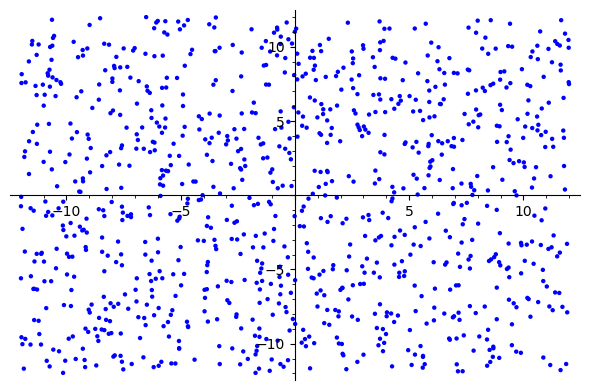

In [1]:
import numpy
rng = numpy.random.default_rng()
N = 1000 #numero de puntos
pts = [24*vector(p-[0.5, 0.5]) for p in rng.random((N,2))]
point(pts)

y definimos un par de funciones: el desplazamiento en cada punto y el de todos los puntos

(el decorador `@parallel` sirve para indicar a sage que puede ejecutar esa funcion en varios procesadores

ver el [manual para multiproceso de sage](https://doc.sagemath.org/html/en/reference/parallel/index.html)

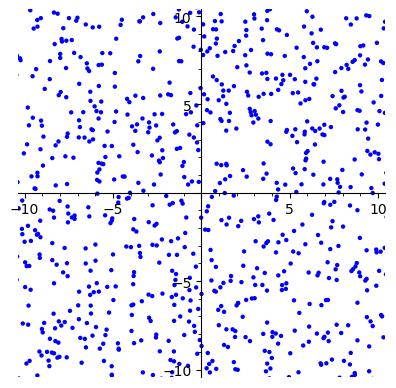

In [2]:
def desp(r,t):
    return r+sin(r.norm()-t)*r/(2*r.norm())

@parallel
def cuadro(t): 
    return [desp(r, t) for r in pts]

list_plot(pts,
          xmin=-10, xmax=10, ymin=-10,ymax=10,
          aspect_ratio=1.0)

ejecutamos la animación, se hace una lista con todos los plots y luego la orden `animate` procesa esa lista

In [3]:
onditas = [list_plot(cuadro(t),
                xmin=-10, xmax=10, ymin=-10,ymax=10,
                aspect_ratio=1.0) for t in sxrange(0, 4*pi, 0.3)]
an = animate(onditas)

ver la documentación de [animate](https://doc.sagemath.org/html/en/reference/plotting/sage/plot/animate.html)

Animation with 42 frames
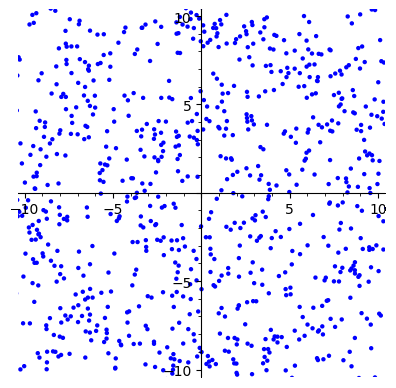

In [4]:
archivo = 'animacion.gif'
an.save(filename=archivo, use_ffmpeg=True)
an

Inclusive podríamos definir otra función de desplazamiento y reconstruir la animación:

Animation with 42 frames
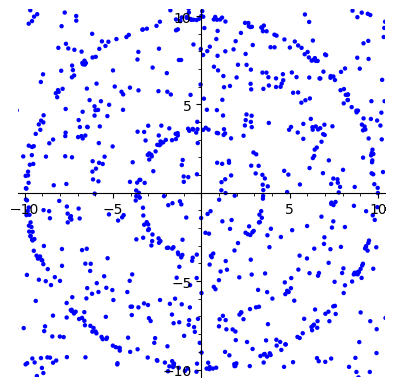

In [5]:
def desp(r,t):
    n = r.norm()
    return r+(cos(2*n-2*t)+sin(n-t))*r/(2*n)

onditas = [list_plot(cuadro(t),
                xmin=-10, xmax=10, ymin=-10,ymax=10,
                aspect_ratio=1.0) for t in sxrange(0, 4*pi, 0.3)]
an = animate(onditas)
an